#### Import of Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [4]:
df = pd.read_csv('appendicitis.csv')


In [5]:
df.head(5)

,At1,At2,At3,At4,At5,At6,At7,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [6]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   At1     106 non-null    float64
 1   At2     106 non-null    float64
 2   At3     106 non-null    float64
 3   At4     106 non-null    float64
 4   At5     106 non-null    float64
 5   At6     106 non-null    float64
 6   At7     106 non-null    float64
 7   Class   106 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.8 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

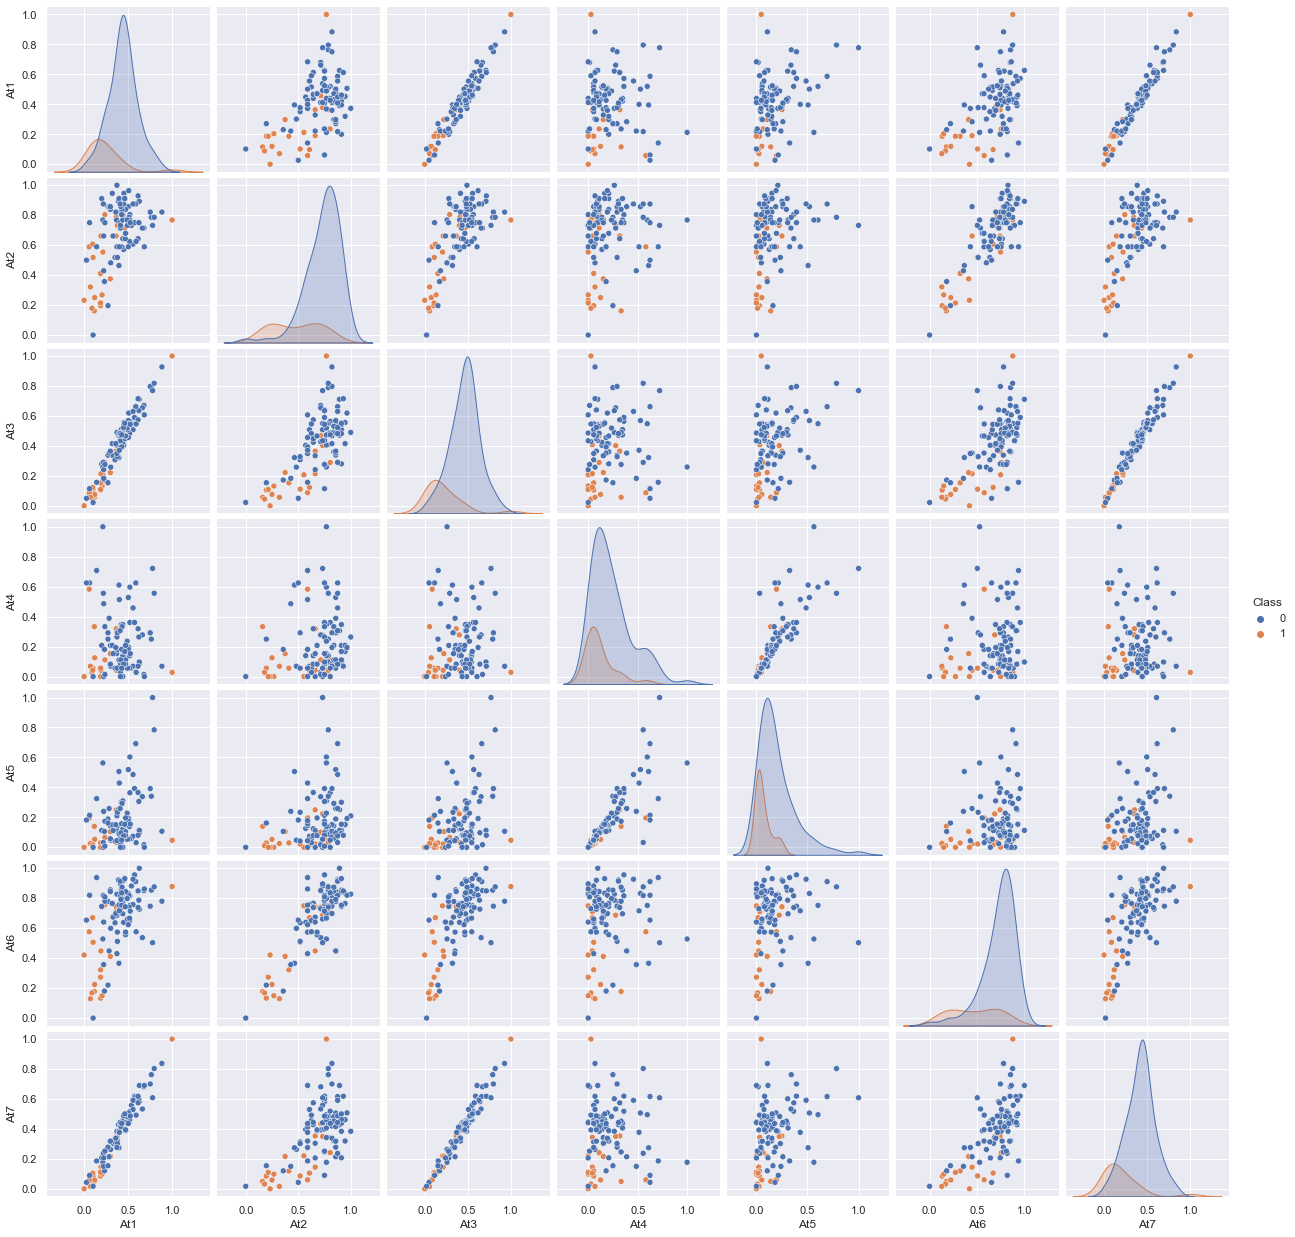

In [7]:
sns.pairplot(df, hue='Class')
plt.show()

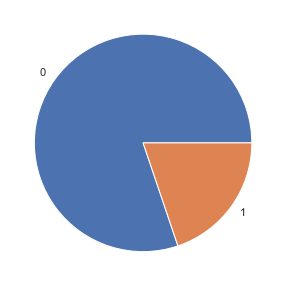

In [8]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [9]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
At1,106.0,0.398491,0.191452,0.0,0.24475,0.4130,0.50575,1.0
At2,106.0,0.682104,0.207134,0.0,0.58900,0.7500,0.82100,1.0
At3,106.0,0.415151,0.205799,0.0,0.27700,0.4425,0.54550,1.0
At4,106.0,0.208745,0.199650,0.0,0.05600,0.1460,0.30250,1.0
At5,106.0,0.169151,0.177329,0.0,0.04925,0.1130,0.22675,1.0
At6,106.0,0.676349,0.218909,0.0,0.57600,0.7440,0.83125,1.0
At7,106.0,0.375396,0.198132,0.0,0.23800,0.3975,0.48675,1.0


#### Standardize the Data

In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
At1,106.0,-5.498746e-17,1.004751,-2.091304,-0.806840,0.076146,0.562904,3.156759
At2,106.0,3.079298e-16,1.004751,-3.308697,-0.451621,0.329346,0.673747,1.542027
At3,106.0,-1.078802e-16,1.004751,-2.026849,-0.674480,0.133523,0.636390,2.855348
At4,106.0,-3.267826e-16,1.004751,-1.050526,-0.768702,-0.315770,0.471827,3.982047
At5,106.0,3.259971e-17,1.004751,-0.958415,-0.679363,-0.318153,0.326358,4.707620
At6,106.0,7.038395e-16,1.004751,-3.104310,-0.460583,0.310505,0.710965,1.485495
At7,106.0,2.314710e-16,1.004751,-1.903679,-0.696753,0.112091,0.564688,3.167440


#### Observations and Variables

In [11]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

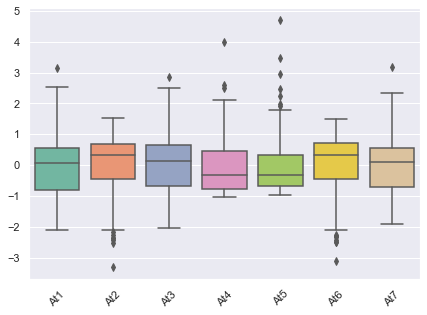

In [12]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

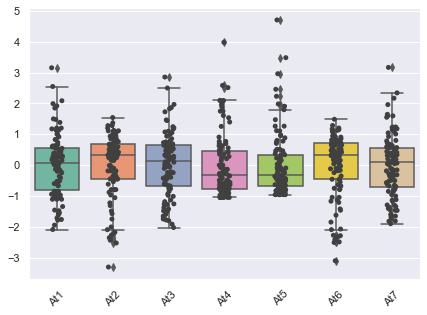

In [13]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

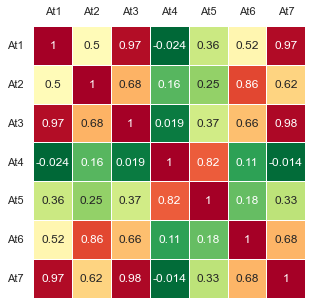

In [14]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [15]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [16]:
out['PC']

,PC1,PC2,PC3
0,1.702815,-1.049454,-0.751323
1,-0.446195,-0.742409,-0.015925
2,2.946865,-0.446734,-0.547625
3,4.039290,-0.298942,1.507631
4,0.787528,-0.504784,-1.284192
...,...,...,...
101,-1.252933,-1.084606,-0.841934
102,5.261260,-0.390044,2.029384
103,-1.292849,0.482259,-0.919508
104,-0.636682,-1.169465,-0.609409


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [98.68%] of the variance'}, xlabel='PC1 (59.5% expl.var)', ylabel='PC2 (24.3% expl.var)'>)

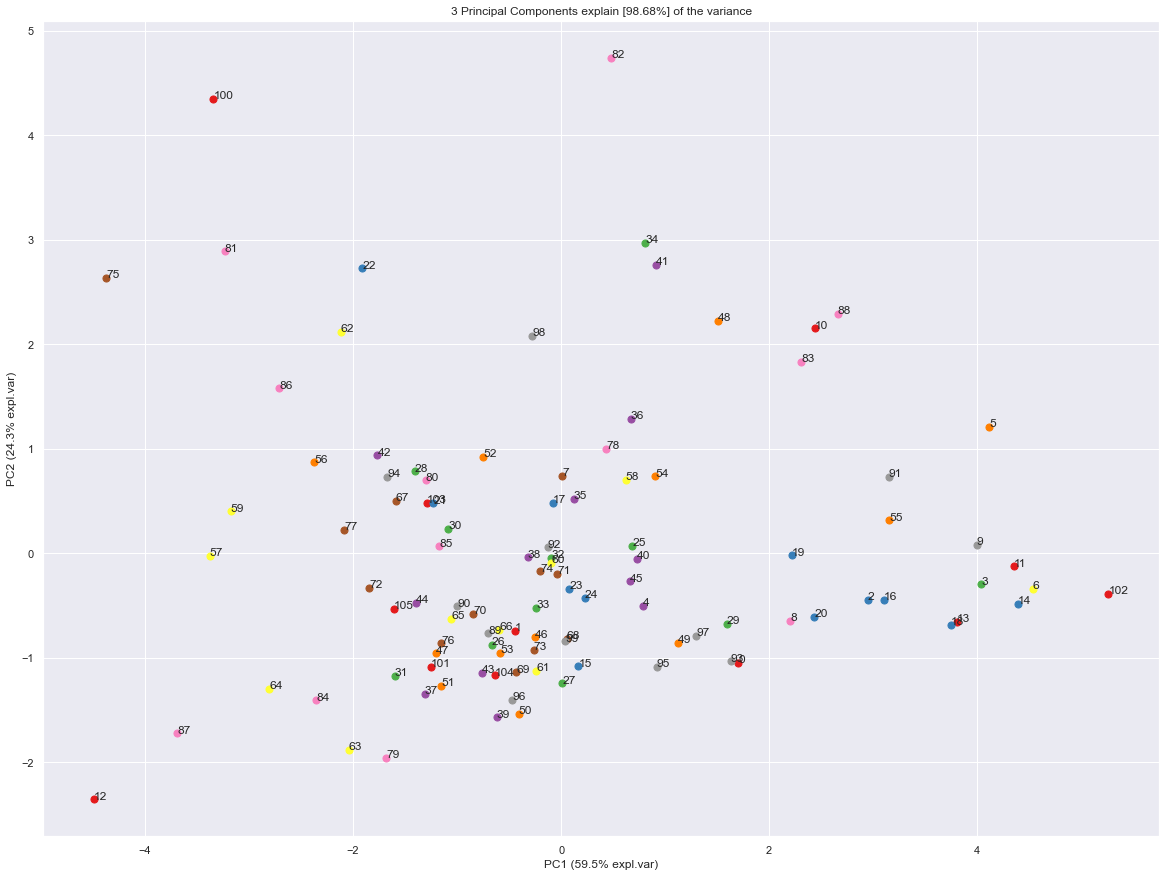

In [17]:
model.scatter(label=True, legend=False)

Eigenvectors

In [18]:
A = out['loadings'].T

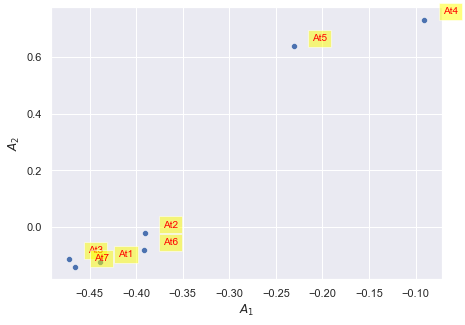

In [19]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

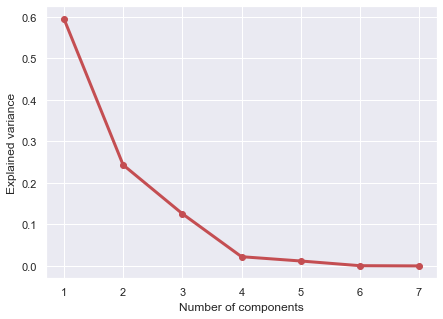

In [20]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

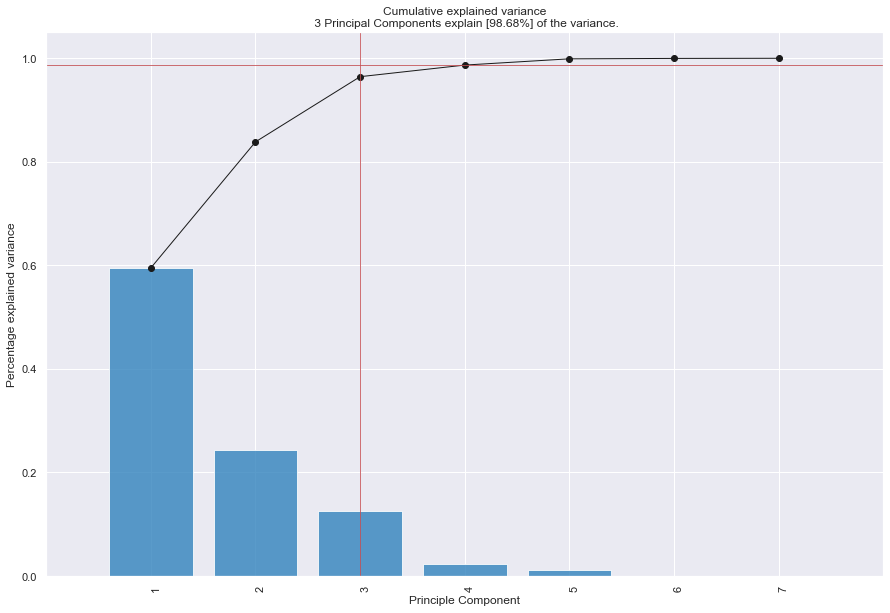

<Figure size 504x360 with 0 Axes>

In [21]:
model.plot();

BiPlot

In [22]:
#model.biplot(label=False, legend=False)

In [23]:
#model.biplot3d(legend=False)

Classification

In [24]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (95, 8)
Unseen Data For Predictions: (11, 8)


In [26]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(95, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8952,0.8400,0.6500,0.6500,0.6333,0.6160,0.6278,0.1980
et,Extra Trees Classifier,0.8810,0.8450,0.7000,0.6500,0.6667,0.6171,0.6232,0.1690
knn,K Neighbors Classifier,0.8786,0.7950,0.6500,0.6167,0.6300,0.5796,0.5830,1.1120
lr,Logistic Regression,0.8667,0.9100,0.4500,0.5000,0.4667,0.4353,0.4387,1.8900
ridge,Ridge Classifier,0.8667,0.0000,0.5000,0.5000,0.5000,0.4600,0.4600,0.0160
lda,Linear Discriminant Analysis,0.8667,0.8000,0.6000,0.5500,0.5667,0.5188,0.5245,0.0170
ada,Ada Boost Classifier,0.8643,0.8100,0.6500,0.6333,0.6167,0.5686,0.5835,0.0710
svm,SVM - Linear Kernel,0.8381,0.0000,0.5500,0.4333,0.4733,0.4137,0.4285,0.0200
gbc,Gradient Boosting Classifier,0.8357,0.7933,0.5500,0.4833,0.5000,0.4467,0.4581,0.0470
nb,Naive Bayes,0.8333,0.8500,0.6500,0.5000,0.5500,0.4721,0.4926,0.0180


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)